### 1. Problem
I will be training a regression model to predict overall student perfomance based on 5 input variables. This dataset is freely provided online.
#### Features introduced:
- Hours Studied
- Previous Scores
- Extracurricular Activities
- Sleep Hours
- Sample Question Papers Practiced
#### Output:
- Performance Index => 0 - 100


Importing Libraries

In [2]:
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score

In [3]:
# for array computations and loading data
import numpy as np
np.set_printoptions(precision=2)

In [4]:
# for data manipulation
import pandas as pd

In [5]:
# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data Cleaning

In [6]:
# Load the CSV file
df = pd.read_csv('Student_Performance.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Save back to CSV
df.to_csv('Cleaned_Student_Performance.csv', index=False, header=None)

### 3. Data Analysis

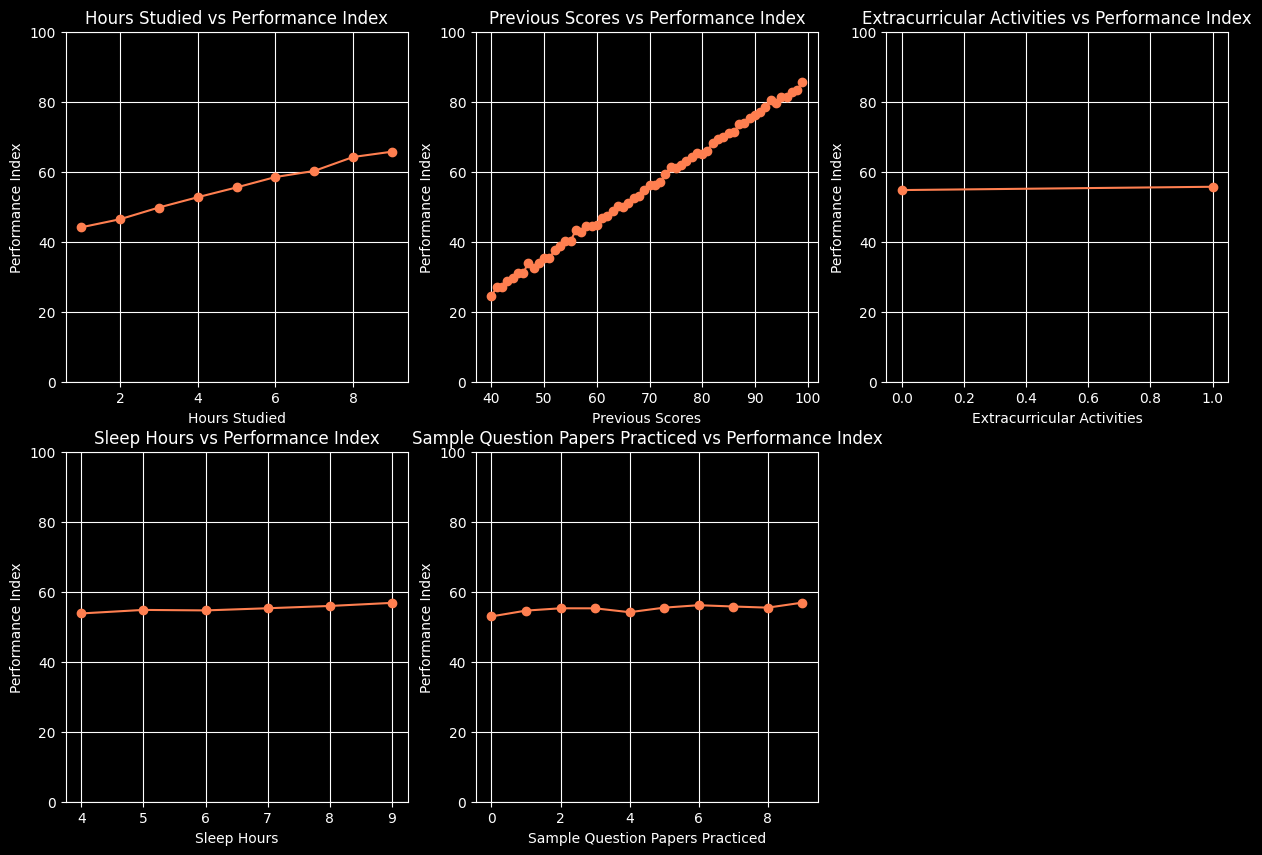

In [7]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
output = 'Performance Index'

plt.style.use('dark_background')
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    grouped = df.groupby(feature)[output].mean().reset_index()
    
    plt.subplot(2, 3, i+1)
    plt.plot(grouped[feature], grouped[output], marker='o', color='coral')
    plt.xlabel(feature)
    plt.ylabel(output)
    plt.ylim(0, 100)
    plt.title(f'{feature} vs {output}')
    plt.grid(True)
plt.show()

### 4. Data Splitting

In [8]:
# Load the dataset from the text file
data = np.loadtxt('Cleaned_Student_Performance.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
X = data[:,:5]
y = data[:,-1]

# Convert output array into 2-D because the commands later will require it
y = np.expand_dims(y, axis=1)
print(X)
print(y)

print(f"the shape of the inputs X is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")

[[ 7. 99.  1.  9.  1.]
 [ 4. 82.  0.  4.  2.]
 [ 8. 51.  1.  7.  2.]
 ...
 [ 6. 83.  1.  8.  5.]
 [ 9. 97.  1.  7.  0.]
 [ 7. 74.  0.  8.  1.]]
[[91.]
 [65.]
 [45.]
 ...
 [74.]
 [95.]
 [64.]]
the shape of the inputs X is: (10000, 5)
the shape of the targets y is: (10000, 1)


Split dataset into training, cross validation, and test sets
* ***training set*** - used to train the model
* ***cross validation set (also called validation, development, or dev set)*** - used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what polynomial features to add to your dataset.
* ***test set*** - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.

In [9]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: X_ and y_.
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (6000, 5)
the shape of the training set (target) is: (6000, 1)

the shape of the cross validation set (input) is: (2000, 5)
the shape of the cross validation set (target) is: (2000, 1)

the shape of the test set (input) is: (2000, 5)
the shape of the test set (target) is: (2000, 1)


### 5. Feature Engineering
Not needed for now.

In [10]:
cv_mses = []  # Move this outside the loop
iterations = 10
for i in range(iterations):
    # Define the degree of the polynomial features
    degree = i + 1

    # Create a pipeline that first transforms the features, then fits the model
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear_regression', LinearRegression())
    ])

    model.fit(X_cv, y_cv)
    y_hat = model.predict(X_cv)
    mse = mean_squared_error(y_cv, y_hat) / 2

    cv_mses.append(mse)  # Append here correctly in the outer list
    print(f"Degree: {degree}, MSE: {mse}")

print(cv_mses)
print(f'Best Cost: {min(cv_mses)} at degree {cv_mses.index(min(cv_mses)) + 1}')

Degree: 1, MSE: 1.9640306913780554
Degree: 2, MSE: 1.9563322762432007
Degree: 3, MSE: 1.9193164415598263
Degree: 4, MSE: 1.8744204536694333
Degree: 5, MSE: 1.7780341542881675
Degree: 6, MSE: 1.6715261144580762
Degree: 7, MSE: 1.5665305976893633
Degree: 8, MSE: 1.553037769602067
Degree: 9, MSE: 1.605920164127072
Degree: 10, MSE: 1.7835532995654586
[1.9640306913780554, 1.9563322762432007, 1.9193164415598263, 1.8744204536694333, 1.7780341542881675, 1.6715261144580762, 1.5665305976893633, 1.553037769602067, 1.605920164127072, 1.7835532995654586]
Best Cost: 1.553037769602067 at degree 8


In [11]:
train_mses = []  # Move this outside the loop
iterations = 10
for i in range(iterations):
    # Define the degree of the polynomial features
    degree = i + 1

    # Create a pipeline that first transforms the features, then fits the model
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear_regression', LinearRegression())
    ])

    model.fit(X_train, y_train)
    y_hat = model.predict(X_train)
    mse = mean_squared_error(y_train, y_hat) / 2

    train_mses.append(mse)  # Append here correctly in the outer list
    print(f"Degree: {degree}, MSE: {mse}")

print(train_mses)
print(f'Best Cost: {round(min(train_mses),2)} at degree {train_mses.index(min(train_mses)) + 1}')

Degree: 1, MSE: 2.0791497044985396
Degree: 2, MSE: 2.074082283710743
Degree: 3, MSE: 2.0598028457721265
Degree: 4, MSE: 2.040133829691795
Degree: 5, MSE: 2.015871291161563
Degree: 6, MSE: 1.9804227872267974
Degree: 7, MSE: 1.9646335455379518
Degree: 8, MSE: 1.9817501419187187
Degree: 9, MSE: 2.066901361981135
Degree: 10, MSE: 2.3033400654715406
[2.0791497044985396, 2.074082283710743, 2.0598028457721265, 2.040133829691795, 2.015871291161563, 1.9804227872267974, 1.9646335455379518, 1.9817501419187187, 2.066901361981135, 2.3033400654715406]
Best Cost: 1.96 at degree 7


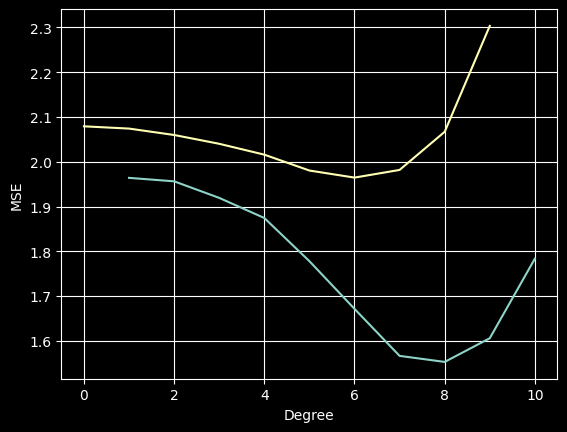

In [12]:
# Plot the results
plt.plot(range(1, 11), cv_mses, train_mses)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [13]:
model.fit(X_train, y_train)
print(model.predict(X)) 

[[92.52]
 [64.33]
 [45.07]
 ...
 [72.77]
 [96.62]
 [64.97]]


### 6. Feature Scaling
$$ z = \frac{x - \mu}{\sigma} $$


In [14]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)
X_cv_scaled = scaler_linear.transform(X_cv)
X_test_scaled = scaler_linear.transform(X_test)

print(f'{X_train_scaled}')
print(f'{X_cv_scaled}')
print(f'{X_test_scaled}')

[[-0.01 -0.48  1.02  0.87  0.84]
 [-0.4   1.19 -0.98 -0.91  1.53]
 [-1.56 -1.46  1.02  0.87  0.14]
 ...
 [ 1.15  1.37 -0.98  1.46 -1.6 ]
 [-0.78  1.66 -0.98  0.28 -0.91]
 [-0.78 -0.88  1.02 -0.32 -0.56]]
[[-0.78 -1.46 -0.98 -1.51 -0.21]
 [ 1.53  0.62  1.02 -1.51  1.18]
 [-1.56 -1.69 -0.98  0.28 -0.21]
 ...
 [-0.4   0.04  1.02  0.28 -1.6 ]
 [ 1.53  0.04 -0.98  0.87 -0.21]
 [-0.01 -0.13 -0.98 -1.51  0.14]]
[[ 0.76  0.62 -0.98 -1.51  1.18]
 [ 0.37 -1.52  1.02 -0.32 -0.21]
 [-1.56 -0.65 -0.98  0.28 -0.21]
 ...
 [ 1.53 -1.23  1.02 -0.91 -0.21]
 [-1.17  0.85 -0.98 -0.32 -0.21]
 [ 1.53  1.37  1.02  0.28  1.53]]


### 7. Model Selection

In [15]:
# Initialize the class
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4, include_bias=False)),
    ('linear_regression', LinearRegression())
])
# Train the model
model.fit(X_train_scaled, y_train )

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

In [16]:
yhat_train = model.predict(X_train_scaled)
yhat_cv = model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Training MSE: {mean_squared_error(y_train, yhat_train) / 2}")
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat_cv) / 2}")
print(f'MSE difference: {mean_squared_error(y_train, yhat_train) / 2 - mean_squared_error(y_cv, yhat_cv) / 2}')

Training MSE: 2.0401338296917952
Cross validation MSE: 2.005651161700357
MSE difference: 0.03448266799143829


### 8. Training & Hyperparameter Tuning

### 9. Model Evaluation

In [17]:
# Make prediction on test set
yhat_test = model.predict(X_test_scaled)

print(f'Estimated Target:\t {np.squeeze(yhat_test, axis=(1,)) // 1}')
print(f'Actual Target:\t\t {np.squeeze(y_test, axis=(1,))}')

Estimated Target:	 [70. 31. 31. ... 44. 60. 92.]
Actual Target:		 [70. 27. 33. ... 47. 60. 93.]


In [18]:
mse = mean_squared_error(y_test, yhat_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')


MSE: 4.47
RMSE: 2.11
MAE: 1.67
R² Score: 0.99


In [21]:
# Get accuracy test vs prediction
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.75%


### Predicting using data outside of dataset
- Hours Studied: 2h
- Previous Scores: 80 marks
- Extra Activities: No
- Hours Sleep: 7
- Sample Practised Paper Done: 2

In [20]:
new_data = np.array([[2, 80, 0, 7, 2]])
new_data_scaled = scaler_linear.transform(new_data)
yhat_new = model.predict(new_data_scaled) // 1
print(f'Est. Student Performance Index: {yhat_new}')

Est. Student Performance Index: [[56.]]
